---
> CIFAR10 - это набор данных, состоящих из картинок, разделённых на 10 классов. 

> Создадим и запустим свёрточную нейронную сеть на основе TensorFlow в Google Collab.

> Аппаратным ускорителем назначим графический процессор (GPU).


> Импортируем необходимые библиотеки.
---

In [ ]:
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import itertools


---
> Загрузим набор данных CIFAR10 из библиотеки TensorFlow.

> Данные уже разделены на те, которые применимы для обучения, и на те, которые нужны для проверки.
---

In [ ]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


---
> Используем метод flatten(), для того чтобы получить копию массива в одномерном виде.
---


In [ ]:
y_train = y_train.flatten()
y_test = y_test.flatten()


---
> При работе с нейронными сетями и в машинном обучении важна предварительная работа с данными. Поэтому следует разобраться в том, что из себя представляет массив данных.

> Удостоверимся, что данные для обучения являются массивом из 50 000 картинок, разделённых на 10 категорий.

> Для этого воспользуемся методом countplot() библиотеки seaborn, который строит диаграмму по количеству значений каждой категории.
---


[[Text(0, 0, 'airplane'),
  Text(0, 0, 'automobile'),
  Text(0, 0, 'bird'),
  Text(0, 0, 'cat'),
  Text(0, 0, 'deer'),
  Text(0, 0, 'dog'),
  Text(0, 0, 'frog'),
  Text(0, 0, 'horse'),
  Text(0, 0, 'ship'),
  Text(0, 0, 'truck')]]

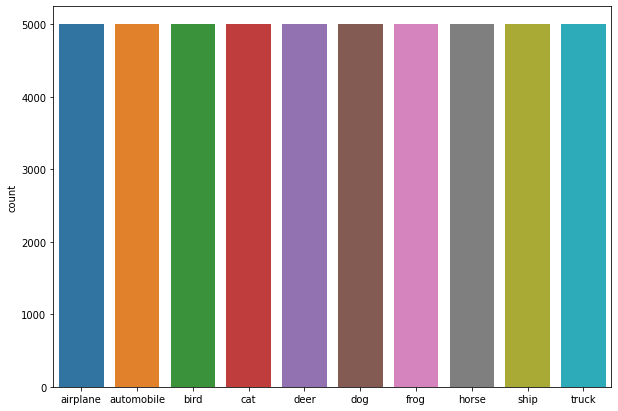

In [ ]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,7))
p = sns.countplot(x = y_train)
p.set(xticklabels=classes)


---

> Кроме этого, следует проверить, есть ли значения NaN в массивах с картинками.

---


In [ ]:
np.isnan(x_train).any()

False

In [ ]:
np.isnan(x_test).any()

False



---


> Определим форму картинки в кортеже input_shape.


> Далее переформируем массив картинок в тензор (50 000 x 32 x 32 x 3) для x_train и тензор (10 000 x 32 x 32 x 3) для x_test.


> В массиве содержится rgb картинка в виде трёхмерного массива или куба размером 32 x 32 x 3, где каждое значение определено от 0 до 255.


> Для представления значений в виде с плавающей запятой от 0 до 1 нормализуем массивы числом 255.0.











---



In [ ]:
input_shape = (32, 32, 3)

x_train=x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 3)
x_train=x_train / 255.0
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 3)
x_test=x_test / 255.0


---

> Преобразуем число, означающее класс картинки в прямой унитарный код (one-hot encoding).

> Например, 8, означающая корабль (ship), кодируется в [0,0,0,0,0,0,0,0,1,0].
---


In [ ]:
y_train = tf.one_hot(y_train.astype(np.int32), depth=10)
y_test = tf.one_hot(y_test.astype(np.int32), depth=10)


---

> Проверим правильность.

---


tf.Tensor([0. 0. 0. 0. 0. 0. 0. 0. 1. 0.], shape=(10,), dtype=float32)


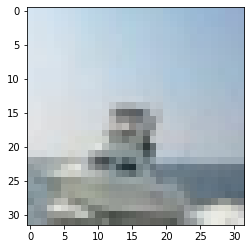

In [ ]:
plt.imshow(x_train[100])
print(y_train[100])

---
> Определим размер пакета (batch_size), количество классов, а также количество эпох - итераций.
---


In [ ]:
batch_size = 40
num_classes = 10
epochs = 60


---

> В модели определены свёрточные слои Conv2D. Первое число является количеством фильтров, а второе размером ядра, которое указывает на величину окна свёртки. Функцией активации служит relu, то есть линейный выпрямитель, который возвращает 0, если вход меньше 0 и возвращает входное значение в ином случае.

> Следующий слой в соответствии с концепцией свёрточных нейронных сетей должен укрупнять масштаб полученных признаков. Для этого используется метод MaxPooling2D, который выполняет понижающую дискретизацию. По умолчанию он выделяет одну ячейку (пиксель) с максимальным значением из матрицы 2 х 2.

> Метод Dropout() используется для борьбы с переобучением. В данном случае случайная четверть и половина узлов в слое не участвует в обучении. Таким образом, данный слой выполняет функцию прореживания.

> Слой Flatten() преобразует тензор в единый вектор.

> Dense() - это обычный слой. Функция активации softmax является обобщением логичстического уравнения для многомерного случая. Softmax используется в последнем слое нейронных сетей для задач классификации. При этом в качестве функции потерь используется перекрёстная энтропия.

---



In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, 3, padding='same', input_shape=x_train.shape[1:], activation='relu'),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax'),
])

model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-06),
            loss='categorical_crossentropy', metrics=['acc'])


---

> Метод fit() тренирует модель в соотвествии с размером пакетов и числом эпох - итераций.

---


In [ ]:
history = model.fit(x_train, y_train, batch_size=batch_size,
                    epochs=epochs)

Epoch 1/60
1250/1250 [==============================] - 7s 5ms/step - loss: 1.8300 - acc: 0.3316
Epoch 2/60
1250/1250 [==============================] - 6s 5ms/step - loss: 1.5291 - acc: 0.4443
Epoch 3/60
1250/1250 [==============================] - 6s 5ms/step - loss: 1.3928 - acc: 0.4991
Epoch 4/60
1250/1250 [==============================] - 6s 5ms/step - loss: 1.3062 - acc: 0.5333
Epoch 5/60
1250/1250 [==============================] - 6s 5ms/step - loss: 1.2305 - acc: 0.5642
Epoch 6/60
1250/1250 [==============================] - 6s 5ms/step - loss: 1.1702 - acc: 0.5860
Epoch 7/60
1250/1250 [==============================] - 6s 5ms/step - loss: 1.1125 - acc: 0.6084
Epoch 8/60
1250/1250 [==============================] - 7s 5ms/step - loss: 1.0617 - acc: 0.6264
Epoch 9/60
1250/1250 [==============================] - 6s 5ms/step - loss: 1.0179 - acc: 0.6414
Epoch 10/60
1250/1250 [==============================] - 7s 5ms/step - loss: 0.9818 - acc: 0.6550
Epoch 11/60
1250/1250 [======


---

> Для оценки обучения представим график потерь и точности. Можно видеть, что в процессе обучения потери уменьшаются, а точность приближается к 80%.

---


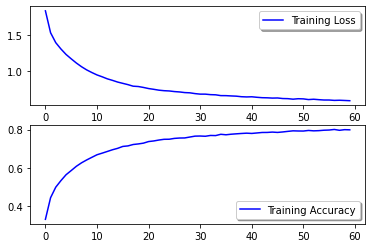

In [56]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training Loss")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training Accuracy")
legend = ax[1].legend(loc='best', shadow=True)


---
> Оценим модель в режиме проверки. Результат показал, что точность составляет 80% с погрешностью, измеряемой в десятичных.
---



In [57]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.6171 - acc: 0.7921



---

> Получим предсказания для проверочного массива картинок. 


> Затем закодируем предсказанные классы в прямой унитарный код.


> Закодируем проверочный массив классов в прямой унитарный код.


> Построим матрицу ошибок.

---



In [58]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred,axis = 1) 
y_true = np.argmax(y_test,axis = 1)
confusion_mtx = tf.math.confusion_matrix(y_true, y_pred_classes)




---
> Из матрицы ошибок можно видеть, что плохо распознаётся птица и кошка, поскольку по морфологическим признакам последняя похожа на собаку при условии, что набор данных представлен в плохом качестве 32 х 32 пикселя.

---


[[Text(0, 0.5, 'airplane'),
  Text(0, 1.5, 'automobile'),
  Text(0, 2.5, 'bird'),
  Text(0, 3.5, 'cat'),
  Text(0, 4.5, 'deer'),
  Text(0, 5.5, 'dog'),
  Text(0, 6.5, 'frog'),
  Text(0, 7.5, 'horse'),
  Text(0, 8.5, 'ship'),
  Text(0, 9.5, 'truck')],
 [Text(0.5, 0, 'airplane'),
  Text(1.5, 0, 'automobile'),
  Text(2.5, 0, 'bird'),
  Text(3.5, 0, 'cat'),
  Text(4.5, 0, 'deer'),
  Text(5.5, 0, 'dog'),
  Text(6.5, 0, 'frog'),
  Text(7.5, 0, 'horse'),
  Text(8.5, 0, 'ship'),
  Text(9.5, 0, 'truck')]]

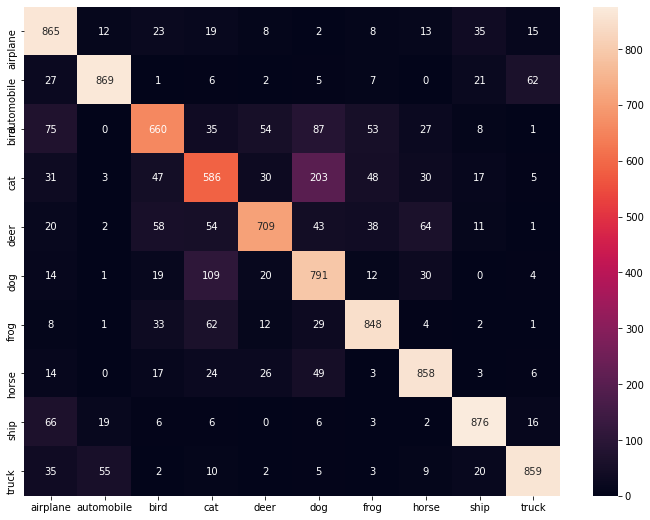

In [60]:
plt.figure(figsize=(12, 9))
c = sns.heatmap(confusion_mtx, annot=True, fmt='g')
c.set(xticklabels=classes, yticklabels=classes)